Enter value of k :  2


      0     1
0  20.0  54.0
1  24.0  45.0


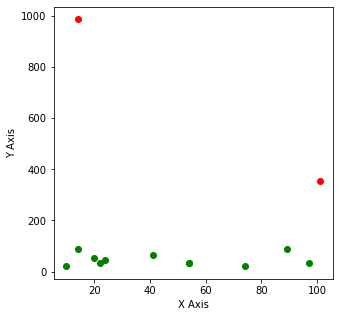

[2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2]


In [1]:
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import random

data=pd.read_csv("k means data.csv",header=None,dtype=float)

    
k = int(input("Enter value of k : "))


m=pd.DataFrame()

rows = data.loc[0:k-1,:]
m=m.append(rows)

  
print(m)

mean=[]
clusterPrev=[]
cluster=[]

while True:    
    for i in range(len(data)):
        for j in range(len(m)):
            mean.append(mt.sqrt((data.loc[i,0]-m.loc[j,0])**2+(data.loc[i,1]-m.loc[j,1])**2))

        ind=0
        ind=min(mean)
        min1=mean.index(ind)
        cluster.append(min1+1)
        m.loc[min1,0] = (m.loc[min1,0] + data.loc[i,0])/2
        m.loc[min1,1] = (m.loc[min1,1] + data.loc[i,1])/2
            
        mean.clear()
        
    if cluster == clusterPrev:
        break;
    else:
        clusterPrev=cluster[:]
        
        m=m.replace(m,0)
            
        for i in range(len(cluster)):
            m.loc[cluster[i]-1,0] += data.loc[i,0]
            m.loc[cluster[i]-1,1] += data.loc[i,1]
        
        for i in range(k):
            m.loc[i,0] /= cluster.count(i+1)
            m.loc[i,1] /= cluster.count(i+1)
        
        cluster.clear()
    
fig = plt.figure(figsize=(5,5))
colour=["red", "green", "blue", "orange", "black", "purple"]
for i in range(len(cluster)):
    plt.plot(data[0][i],data[1][i],c=colour[cluster[i]-1],marker='o')

plt.ylabel('Y Axis')
plt.xlabel('X Axis')
  
plt.show()
print(cluster)
print(clusterPrev)